In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [ ]:
import os
from dotenv import load_dotenv
import math
import numpy as np
import matplotlib.pyplot as plt

# LLM setup

In [3]:
# Load the API key from the .env file
load_dotenv()

True

## OpenAI library

In [4]:
from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
  model="gpt-4o-mini",
  messages=[
    {"role": "user", "content": "When is your knowledge cutoff?"}
  ]
)  

In [5]:
response

ChatCompletion(id='chatcmpl-BDFbbrcWGyfrAFK6LyvjSFwCNYK7v', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='My knowledge cutoff is in October 2021. I do not have information or updates beyond that date.', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1742497951, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_b8bc95a0ac', usage=CompletionUsage(completion_tokens=22, prompt_tokens=13, total_tokens=35, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

In [6]:
print(response.choices[0].message.content)

My knowledge cutoff is in October 2021. I do not have information or updates beyond that date.


## LangChain framework

This interface is a bit more useful for this tutorial. But the model under the hood is identical regardless of the framework

In [7]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini")
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x1373f5d10>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x1373fe510>, root_client=<openai.OpenAI object at 0x136ced950>, root_async_client=<openai.AsyncOpenAI object at 0x136d4e270>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [8]:
def get_chat_response(model, prompt):
    messages = [
        {"role": "user", "content": prompt}
    ]
    return model.invoke(messages).content

In [9]:
# https://platform.openai.com/docs/models/gpt-4o-mini
get_chat_response(llm, "When is your knowledge cutoff?")

"My knowledge cutoff is in October 2021. I don't have information on events or developments that occurred after that date. If you have questions or need information up to that time, feel free to ask!"

# Pure LLM limitations

## Knowledge cutoff

In [10]:
get_chat_response(llm, "When is your knowledge cutoff?")

'My knowledge cutoff date is in October 2023. This means that any events or developments occurring after that date are not included in my training data. If you have questions about information available up to that time, feel free to ask!'

model didn't see anything prior to this date and doesn't know much about how the world evolved

In [11]:
get_chat_response(llm, "Who won US elections of 2024?")

"I'm sorry, but I don't have information on events beyond October 2023, including the results of the 2024 US elections. For the most current updates, please refer to a reliable news source."

In [12]:
response = get_chat_response(llm, "what's the formal definition of ai agent according to huggingface's course on agents? it starts with 'An Agent is a system that leverages'")
print(response)

I don't have access to external content such as specific courses from Hugging Face, including their definitions. However, a typical formal definition of an AI agent in the context of agent-based systems often begins along the lines of:

"An agent is a system that leverages sensors and actuators to perceive its environment and take actions to achieve specific goals." 

If you need the exact phrasing from Hugging Face's course, I recommend checking their official resources or course materials directly.


this model also doesn't have access to the Internet

## Not widely-known facts

In [13]:
response = get_chat_response(llm, "Don't you remember what the original BERT paper's section '2 Related Work' starts with? Just in case, it's v2 of 24th of May 2019 on arxiv")
print(response)

I don't have the ability to recall specific sections or content verbatim from copyrighted documents like the original BERT paper. However, I can provide a summary or discuss the key ideas and concepts presented in the paper. "BERT" stands for Bidirectional Encoder Representations from Transformers, and it introduced a new method for pre-training language representations. If you need specific information or a summary about related work in the context of BERT, feel free to ask!


even having this paper (most likely) in the training dataset, the model doesn't train or learn the training data word by word

## Internal data

In [14]:
response = get_chat_response(llm, "How many chapters are there in the description of my video about kedro-mlflow plugin?")
print(response)

I don't have access to your specific video or its description. You can easily find out the number of chapters by watching your video or checking the description if it includes time stamps for different sections. If you provide more details about your video, I may be able to help you generate content or discuss chapters related to the kedro-mlflow plugin.


# Augmented generation

## YouTube description example

In [15]:
prompt = """
How many chapters are there in the description of my video about kedro-mlflow plugin?

Below is the description of the video:
Dive into the power of the Kedro-MLflow plugin — a seamless integration of Kedro’s robust pipeline management with MLflow’s comprehensive experiment tracking and model registry. In this video, we explore how combining these two frameworks can resolve the reproducibility challenges that often plague modern ML solutions.

Chapters:
00:00 – Introduction
01:29 – Use-Case Study: The Spaceflights Tutorial
05:49 – Solution Pipeline Overview
11:03 – Defining the Reproducibility Problem
14:21 – Exploring Kedro-viz
19:40 – Kedro Project Structure
23:37 – Deep Dive: ETL Application
27:17 – Deep Dive: ML Application
27:44 – Kedro-MLflow Plugin in Action
37:43 – Advanced Usage: Pipeline as a Model
39:43 – Testing the Inference Pipeline
48:42 – Kedro Context in Jupyter Notebook
56:21 – Conclusion

Links:
• Tutorial used in the video: https://github.com/OlegBEZb/kedro_mlf...
• Kedro-MLflow plugin: https://github.com/Galileo-Galilei/ke...
• MLflow: https://mlflow.org/docs/latest/index....
• Kedro: https://kedro.org/
• First-party plugins maintained by the Kedro team: https://github.com/kedro-org/kedro-pl...
• Original Kedro-MLflow Tutorial which I used a lot: https://github.com/Galileo-Galilei/ke...
• Kedro spaceflights tutorial: https://docs.kedro.org/en/stable/tuto...

Connect with Me:
 • Telegram: https://t.me/DeepStuffChannel"""

response = get_chat_response(llm, prompt)
print(response)

Based on the provided video description, there are **10 chapters** listed.


## "Understanding the planning of LLM agents" paper example

In [16]:
# here is just roughly copied the first page of the paper or so
prompt = """
What is the Taxonomy on LLM-Agent planning? Answer by just listing the main directions.

Below is the excerpt from the paper:
As Large Language Models (LLMs) have shown
significant intelligence, the progress to leverage
LLMs as planning modules of autonomous agents
has attracted more attention. This survey provides
the first systematic view of LLM-based agents
planning, covering recent works aiming to improve
planning ability. We provide a taxonomy of ex-
isting works on LLM-Agent planning, which can
be categorized into Task Decomposition, Plan Se-
lection, External Module, Reflection and Memory.
Comprehensive analyses are conducted for each di-
rection, and further challenges for the field of re-
search are discussed.
1 Introduction
Autonomous agents have been recognized as intelligent en-
tities capable of accomplishing specific tasks, via perceiving
the environment, planning, and executing actions. Planning,
as one of the most critical capabilities for agents, requires
complicated understanding, reasoning, and decision-making
progress [Ghallab et al., 2004].Despite the abstract concept of planning, a general for-
mulation of the planning tasks can be described as follows.
Given time step t, with the environment denoted as E, theaction space as A, the task goal as g, and the action at step
t as at∈ A, the planning procedure can be expressed as the
generation of a sequence of actions:
p = (a0, a1, ··· , at) = plan(E, g; Θ, P).
where Θand P represent the parameters of the LLM and the
prompts for the task, respectively.
Conventional works mainly rely on symbolic methods or
reinforcement learning-based methods, such as Planning Do-
main Definition Language (PDDL) [Aeronautiques et al.,
1998; Haslum et al., 2019] or policy learning [He et al., 2015;
Yao et al., 2020a]. However, those conventional methods
have several limitations. Symbolic methods require conver-
sion from flexible natural language-described problems into
symbolic modeling, which may require human experts’ ef-
forts. Usually, this kind of method lacks error tolerance, re-
sulting in failures even if there are only a few errors. Re-
inforcement learning (RL) methods are often combined with
∗Defu Lian is the corresponding author.Planning
Ability
Selection
Decomposition
External
Planner Reflection
CoT ReAct
VisualChatGPT Plan andSolve
PoT
Progprompt HuggingGPT
Memory
Figure 1: Taxonomy on LLM-Agent planning.
deep models, which serve as the policy network or reward
model. While RL algorithms often require a large number
of samples (interactions with the environment) to learn an ef-
fective policy, this can be impractical or costly in scenarios
where collecting data is time-consuming or expensive.
In recent years, the emergence of Large Language Models
(LLMs) has marked a paradigm shift. LLMs have achieved
remarkable success across various domains, showcasing sig-
nificant intelligence in reasoning, tool usage, planning, and
instruction-following. The surprising intelligence of LLMs
sheds light on employing LLMs as the cognitive core of
agents, thereby offering the potential to improve planning
ability. Numerous methodologies have been developed to
harness the potential of LLMs for agent planning. While ex-
isting surveys have attempted to summarize techniques for
LLMs [Zhao et al., 2023a], LLMs for decision-making [Yang
et al., 2023a], reasoning [Sun et al., 2023], tool learning [Qin
et al., 2023], and autonomous agents [Wang et al., 2023a],
they often lack a detailed analysis of planning ability within
the literature. In this survey, we analyze the latest research
works and discuss the advantages and limitations, aiming to
provide a systematic view of the planning ability of LLM-
based agents. Existing methods are further categorized into
five representative directions, with each direction undergo-
ing comprehensive analysis. Furthermore, we have evaluated
arXiv:2402.02716v1  [cs.AI]  5 Feb 2024
several representative methods on four benchmarks. To the
best of our knowledge, this is the first work that comprehen-
sively analyzes LLM-based agents from the planning abili-
ties.
The subsequent sections of this paper are organized as fol-
lows. In Section 2, we categorize the works into five main-
stream directions and analyze their ideas regarding planning
ability. Sections 3 to 7 provide detailed discussions and anal-
ysis of each direction. Finally, Section 9 concludes the sur-
vey, offering insights into future directions in this field."""

response = get_chat_response(llm, prompt)
print(response)

The main directions in the taxonomy of LLM-Agent planning are:

1. Task Decomposition
2. Plan Selection
3. External Module
4. Reflection
5. Memory


would be nice if these quotes would be found for us automatically, right?

# Traditional Retrieval-Augmented Generation

There are some confusing statements on the web the traditional RAG may use various tools like search engine and calculator. In this tutorial I insist that traditional RAG works only with the retrieval component\tool. So we will concentrate on a collection of documents and about it's incorporation into the LLM

## Load documents

In [18]:
from langchain_community.document_loaders import BSHTMLLoader, PyPDFLoader

def load_documents(file_paths: list) -> list:
    """
    Reads a collection of documents from a list of file paths.
    Depending on the file type, different processing is applied:
    
      - HTML files (.html, .htm): Uses BSHTMLLoader. Multiple sections (if any) are combined.
      - PDF files (.pdf): Uses PyPDFLoader and concatenates all pages.
      - TXT files (.txt): Reads the file directly.
    
    Each file produces one document.
    
    Parameters:
        file_paths (list): List of file paths to documents.
    
    Returns:
        list: A list of document-like dictionaries with keys 'page_content' and 'metadata'.
    """
    documents = []
    
    for file_path in file_paths:
        ext = os.path.splitext(file_path)[1].lower()
        
        if ext in [".html", ".htm"]:
            loader = BSHTMLLoader(file_path)
            docs = loader.load()  # loader.load() returns a list of document objects
            # Combine all sections into one string.
            combined_text = "\n".join([doc.page_content for doc in docs])
            documents.append({
                "page_content": combined_text,
                "metadata": {"source": file_path}
            })
        
        elif ext == ".pdf":
            loader = PyPDFLoader(file_path)
            pages = list(loader.lazy_load())  # Collect all pages
            # Concatenate text from all pages.
            combined_text = "\n".join([page.page_content for page in pages])
            documents.append({
                "page_content": combined_text,
                "metadata": {"source": file_path}
            })
        
        elif ext == ".txt":
            with open(file_path, "r", encoding="utf-8") as f:
                content = f.read()
            documents.append({
                "page_content": content,
                "metadata": {"source": file_path}
            })
        
        else:
            print(f"File type {ext} is not supported. Skipping {file_path}")
    
    return documents

In [19]:
os.listdir("documents")

['Gemini 2.0 model updates_ 2.0 Flash, Flash-Lite, Pro Experimental.html',
 'AGENTIC RETRIEVAL-AUGMENTED GENERATION: A SURVEY ON AGENTIC RAG.pdf',
 'Tackling the ML Reproducibility Curse with the Kedro-MLflow Plugin description.txt',
 'New tools for building agents _ OpenAI.html',
 'Understanding the planning of LLM agents: A survey.pdf',
 'Introducing GPT-4.5 _ OpenAI.html',
 'OpenAI o3-mini _ OpenAI.html',
 'RAG, AI Agents, and Agentic RAG_ An In-Depth Review and Comparative Analysis _ DigitalOcean.html',
 'Building Effective AI Agents _ Anthropic _ Anthropic.html']

In [20]:
file_paths = ["documents/" + file for file in os.listdir("documents")]
documents = load_documents(file_paths)
len(documents)

9

In [22]:
[d["metadata"] for d in documents]

[{'source': 'documents/Gemini 2.0 model updates_ 2.0 Flash, Flash-Lite, Pro Experimental.html'},
 {'source': 'documents/AGENTIC RETRIEVAL-AUGMENTED GENERATION: A SURVEY ON AGENTIC RAG.pdf'},
 {'source': 'documents/Tackling the ML Reproducibility Curse with the Kedro-MLflow Plugin description.txt'},
 {'source': 'documents/New tools for building agents _ OpenAI.html'},
 {'source': 'documents/Understanding the planning of LLM agents: A survey.pdf'},
 {'source': 'documents/Introducing GPT-4.5 _ OpenAI.html'},
 {'source': 'documents/OpenAI o3-mini _ OpenAI.html'},
 {'source': 'documents/RAG, AI Agents, and Agentic RAG_ An In-Depth Review and Comparative Analysis _ DigitalOcean.html'},
 {'source': 'documents/Building Effective AI Agents _ Anthropic _ Anthropic.html'}]

In [26]:
[len(d["page_content"]) for d in documents]

[21985, 104947, 1335, 20549, 50608, 22005, 11975, 45840, 18777]

In [27]:
[len(d["page_content"].split()) for d in documents]

[1503, 13894, 167, 2826, 7574, 3060, 1570, 5945, 2652]

I very important topic which we omit for now is the document size. It's a rare situation in real cases that you will be able to deal with the whole documents. Usually the documents are split into pieces according to some logic suitable for a specific usecase.  
Different chunking strategies: https://medium.com/@anuragmishra_27746/five-levels-of-chunking-strategies-in-rag-notes-from-gregs-video-7b735895694d

## Keyword search (manual)

1. Tokenize documents
2. Collect a vocabulary of all unique tokens
3. Represent documents as vectors of the size of vocabulary. The presence of the Nth word in the document is marked with the number of such occurances. The absence - with 0.
4. To find the document nearest to the input query:
    1. Encode the query into vector in the same way as we encoded all documents
    2. Calculate the similarity of the query vector with all document vectors and retrieve the closest

In [28]:
from collections import Counter

# Simple function to tokenize text (lowercase & split words)
def tokenize(text):
    return text.lower().split()

In [29]:
tokenize("Hello I'm Oleg")

['hello', "i'm", 'oleg']

In [30]:
tokenized_documents = [tokenize(d["page_content"]) for d in documents]

In [31]:
[len(d) for d in tokenized_documents]

[1503, 13894, 167, 2826, 7574, 3060, 1570, 5945, 2652]

In [34]:
documents[0]["page_content"][:100]

'\n\n\n\nGemini 2.0 model updates: 2.0 Flash, Flash-Lite, Pro Experimental\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n'

In [32]:
tokenized_documents[0][:10]

['gemini',
 '2.0',
 'model',
 'updates:',
 '2.0',
 'flash,',
 'flash-lite,',
 'pro',
 'experimental',
 '[{"model":']

In [35]:
from functools import reduce

# Create a union set of elements from tokenized_documents
vocab = reduce(lambda x, y: x.union(y), map(set, tokenized_documents))
vocab = list(vocab)
len(vocab)

9614

In [36]:
vocab[:10]

['years,',
 'deployment.',
 'platform2025authorsopenai',
 'conversation.comparative',
 'resourcesnewscustomer',
 'duberstein,',
 'prompt:',
 'grow.',
 'strengths',
 'usa,']

In [37]:
# Create count vectors for each document
doc_vectors = []
for tokens in tokenized_documents:
    counts = Counter(tokens)
    # Create a vector that counts each word in the vocabulary
    vector = [counts[word] for word in vocab]
    doc_vectors.append(vector)

In [46]:
documents[-1]["metadata"]

{'source': 'documents/Building Effective AI Agents _ Anthropic _ Anthropic.html'}

In [45]:
"resourcesnewscustomer" in tokens

True

In [42]:
vector[:10]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [43]:
vocab[:10]

['years,',
 'deployment.',
 'platform2025authorsopenai',
 'conversation.comparative',
 'resourcesnewscustomer',
 'duberstein,',
 'prompt:',
 'grow.',
 'strengths',
 'usa,']

In [52]:
documents[-1]["page_content"][18488-100:18488+100]

'pusCommitments TransparencyResponsible scaling policySecurity and complianceSolutionsCodingLearning resourcesNewsCustomer storiesEngineering at AnthropicCompanyAbout usCareersHelp and securityStatusAv'

In [54]:
len(doc_vectors), len(doc_vectors[0])

(9, 9614)

In [56]:
# Process a query using the same vocabulary
query = "New features of gpt 4.5"
query_tokens = tokenize(query)
query_counts = Counter(query_tokens)
query_vector = [query_counts[word] for word in vocab]

print("\nQuery Vector:")
print(query_vector)


Query Vector:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [267]:
# Define a simple cosine similarity function
def cosine_similarity(v1, v2):
    dot_product = sum(a * b for a, b in zip(v1, v2))
    norm1 = math.sqrt(sum(a * a for a in v1))
    norm2 = math.sqrt(sum(b * b for b in v2))
    if norm1 == 0 or norm2 == 0:
        return 0.0
    return dot_product / (norm1 * norm2)


cosine_similarity([1, 0, 1], [0, 1, 0])

0.0

In [58]:
cosine_similarity([1, 0], [2, 0])

1.0

In [59]:
cosine_similarity([1, 0], [3, 0])

1.0

In [60]:
cosine_similarity([1, 0], [0, 1])

0.0

In [61]:
cosine_similarity([1, 0, 1], [0, 1, 1])

0.4999999999999999

In [62]:
cosine_similarity([1, 0, 1], [1, 0, 1])

0.9999999999999998

In [63]:
non_zero_indices = [i for i, value in enumerate(query_vector) if value != 0]
print(non_zero_indices)

[3611, 4064, 5228, 7143, 8606]


In [65]:
query

'New features of gpt 4.5'

In [64]:
non_zero_vocab_elements = [vocab[i] for i in non_zero_indices]
print(non_zero_vocab_elements)

['gpt', 'features', '4.5', 'new', 'of']


In [66]:
# Function to find the nearest document based on a query string
def find_nearest_document(query, vocab, doc_vectors):
    query_tokens = tokenize(query)
    query_counts = Counter(query_tokens)
    # Build the query vector based on the vocabulary
    query_vector = [query_counts[word] for word in vocab]
    best_index = None
    best_similarity = -1  # Initialize with a value lower than any possible similarity

    # Compare query vector with each document vector
    for idx, doc_vector in enumerate(doc_vectors):
        similarity = cosine_similarity(query_vector, doc_vector)
        if similarity > best_similarity:
            best_similarity = similarity
            best_index = idx

    return best_index, best_similarity

### Example with the new features of GPT-4.5

In [ ]:
# Test the function with a query
query = "New features of gpt-4.5"
best_idx, best_sim = find_nearest_document(query, vocab, doc_vectors)
print("\nBest matching document index:", best_idx)
print("Similarity score:", best_sim)


Best matching document index: 5
Similarity score: 0.2213121463225094


In [69]:
documents[best_idx]["metadata"]

{'source': 'documents/Introducing GPT-4.5 _ OpenAI.html'}

In [70]:
[t for t in tokenize(query) if t in set(tokenized_documents[best_idx])]

['new', 'features', 'of', 'gpt-4.5']

### Example with the utility-based agents

In [71]:
# Test the function with a query
query = "What was the article talking about utility-based agents? There was something about utility functions"
best_idx, best_sim = find_nearest_document(query, vocab, doc_vectors)
print("\nBest matching document index:", best_idx)
# print("Best matching document:", documents[best_idx])
print("Similarity score:", best_sim)


Best matching document index: 7
Similarity score: 0.17038091753393353


In [72]:
[t for t in tokenize(query) if t in set(tokenized_documents[best_idx])]

['the',
 'article',
 'about',
 'utility-based',
 'there',
 'about',
 'utility',
 'functions']

In [73]:
documents[best_idx]["metadata"]

{'source': 'documents/RAG, AI Agents, and Agentic RAG_ An In-Depth Review and Comparative Analysis _ DigitalOcean.html'}

## Keyword search using sklearn

This took pretty much coding. Let's automate the text transformation into a vector

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

# this is a vectorized version of the same function we already created ourselves
from sklearn.metrics.pairwise import cosine_similarity

In [77]:
# Initialize and fit the CountVectorizer on the documents
vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
doc_vectors = vectorizer.fit_transform(d["page_content"] for d in documents)

In [78]:
doc_vectors.shape

(9, 9614)

In [84]:
def find_nearest_document_using_sklearn(query, vectorizer, doc_vectors):
    # Transform the query into a vector using the same vocabulary
    query_vector = vectorizer.transform([query])
    # Compute cosine similarity between the query and all document vectors
    similarities = cosine_similarity(query_vector, doc_vectors)
    best_idx = similarities.argmax()
    best_sim = similarities[0, best_idx]
    return best_idx, best_sim

### Example with the utility-based agents

In [85]:
# Test the function with a query
query = "What was the article talking about utility-based agents? There was something about utility functions"
best_idx, best_sim = find_nearest_document_using_sklearn(query, vectorizer, doc_vectors)

print("Best matching document index:", best_idx)
print("Similarity score:", best_sim)

Best matching document index: 7
Similarity score: 0.1703809175339335


In [86]:
cosine_similarity(vectorizer.transform([query]), doc_vectors[best_idx])

array([[0.17038092]])

the same similarity as we achieved manually

In [89]:
id_of_the_token = vectorizer.vocabulary_["the"]
id_of_the_token

8549

In [90]:
doc_vectors[best_idx].toarray()[0][id_of_the_token]

np.int64(281)

In the article, the token "the" appears 281 times. Our approach treats the words in the "Bag of Words" manner and it doesn't know the order of them - just the number of occurances. Let's increase the amount of "the" and see what happens

In [92]:
cosine_similarity(vectorizer.transform([query]), vectorizer.transform([documents[best_idx]["page_content"] + " the" * 281]))

array([[0.22240246]])

In [93]:
vectorizer.transform([documents[best_idx]["page_content"] + "the " * 281]).toarray()[0][id_of_the_token]   

np.int64(561)

We have increased the amount of "the" and got increase in similarity. Doesn't make sense

## TF-IDF

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())
doc_vectors = vectorizer.fit_transform(d["page_content"] for d in documents)
doc_vectors.shape

(9, 9614)

In [98]:
query = "What was the article talking about utility-based agents? There was something about utility functions"
best_idx, best_sim = find_nearest_document_using_sklearn(query, vectorizer, doc_vectors)

print("Best matching document index:", best_idx)
print("Similarity score:", best_sim)

Best matching document index: 7
Similarity score: 0.12364720000734203


### boost term "the"

In [99]:
id_of_the_token = vectorizer.vocabulary_["the"]
id_of_the_token

8549

In [100]:
doc_vectors[best_idx].toarray()[0][id_of_the_token]

np.float64(0.5131062785708985)

In [101]:
cosine_similarity(vectorizer.transform([query]), vectorizer.transform([documents[best_idx]["page_content"] + " the" * 281]))

array([[0.14432805]])

In [102]:
vectorizer.transform([documents[best_idx]["page_content"] + " the" * 281]).toarray()[0][id_of_the_token]

np.float64(0.7670628122326831)

both similarity and feature value (TF-IDF score) do not increase as much as for count vectorizer

### boost term "utility"

In [103]:
id_of_the_token = vectorizer.vocabulary_["utility"]
id_of_the_token

9011

In [104]:
doc_vectors[best_idx].toarray()[0][id_of_the_token]

np.float64(0.042883525934867904)

In [105]:
vectorizer.transform([documents[best_idx]["page_content"] + " utility" * 100]).toarray()[0][id_of_the_token]

np.float64(0.46124473258736176)

In [106]:
cosine_similarity(vectorizer.transform([query]), vectorizer.transform([documents[best_idx]["page_content"] + " utility" * 100]))

array([[0.25924899]])

We generally expect common words to have TF‑IDF scores near 0 (or very low values if a smoothing constant is added), while rare, informative words can yield much higher scores. This behavior is what makes TF‑IDF effective for highlighting discriminative keywords in text. In our example we have too few documents and therefore the actual TF-IDF scores are not very helpful. But the dynamics of the final similarity when changing common and rare words is visible.

## RAG powered by TF-IDF

In [107]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())
doc_vectors = vectorizer.fit_transform(d["page_content"] for d in documents)

In [108]:
query = "What are the Gemini 2.0 model updates as of Feb 05, 2025? Answer shortly"

In [109]:
best_idx, best_sim = find_nearest_document_using_sklearn(query, vectorizer, doc_vectors)
print("Best matching document index:", best_idx)
print("Similarity score:", best_sim)

Best matching document index: 0
Similarity score: 0.3373848437673668


In [118]:
doc_vectors

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 14308 stored elements and shape (9, 9614)>

In [110]:
documents[best_idx]["metadata"]

{'source': 'documents/Gemini 2.0 model updates_ 2.0 Flash, Flash-Lite, Pro Experimental.html'}

In [111]:
prompt = """
{user_query}

Below is the name of the document retrieved by the TF-IDF-based document search:
{retrieved_document_name}

Below is the text retrieved by the TF-IDF-based document search:
{retrieved_text}
"""
print(prompt)


{user_query}

Below is the name of the document retrieved by the TF-IDF-based document search:
{retrieved_document_name}

Below is the text retrieved by the TF-IDF-based document search:
{retrieved_text}



In [113]:
formatted_prompt = prompt.format(
    user_query=query,
    retrieved_document_name=documents[best_idx]["metadata"]["source"],
    retrieved_text=documents[best_idx]["page_content"]
) 
print(formatted_prompt)


What are the Gemini 2.0 model updates as of Feb 05, 2025? Answer shortly

Below is the name of the document retrieved by the TF-IDF-based document search:
documents/Gemini 2.0 model updates_ 2.0 Flash, Flash-Lite, Pro Experimental.html

Below is the text retrieved by the TF-IDF-based document search:




Gemini 2.0 model updates: 2.0 Flash, Flash-Lite, Pro Experimental































































      [{"model": "blogsurvey.survey", "pk": 5, "fields": {"name": "Sentiment Change - All Articles - Nov 2024", "survey_id": "sentiment-change-all-articles-nov-2024_241031", "scroll_depth_trigger": 75, "previous_survey": null, "display_rate": 50, "thank_message": "Thank you!", "thank_emoji": "✅", "questions": "[{\"id\": \"c32a4772-5575-4985-814a-afd8d15d5d6d\", \"type\": \"simple_question\", \"value\": {\"question\": \"After reading this article, how has your perception of Google changed?\", \"responses\": [{\"id\": \"cb111cda-60ba-4ac5-8260-17c5326e485b\", 

In [114]:
response = get_chat_response(llm, formatted_prompt)
print(response)

As of February 5, 2025, updates for the Gemini 2.0 model include:

1. **Gemini 2.0 Flash**: Now generally available, optimized for developers with low latency and enhanced performance.
2. **Gemini 2.0 Pro**: An experimental version released, offering the best coding performance and complex prompt handling, with a 2 million token context window.
3. **Gemini 2.0 Flash-Lite**: A cost-efficient model introduced in public preview, better in quality than the previous 1.5 Flash model.
4. **Flash Thinking Experimental**: Available to users for enhanced reasoning capabilities.

All models support multimodal input and text output, with continuous improvements anticipated.


In [115]:
query

'What are the Gemini 2.0 model updates as of Feb 05, 2025? Answer shortly'

In [116]:
response = get_chat_response(llm, query)
print(response)

I'm sorry, but I don't have access to information beyond October 2023, and I can't provide updates on the Gemini 2.0 model or any other developments after that date. Please check the latest sources or the official announcements for current information.


## Further readings for "classical" document similarity

Retrieval to study yourself: 
1. BM-25: step further from TF-IDF
2. Python extension for Apache Lucene: https://lucene.apache.org/pylucene/

# Embeddings and semantic search

## Embeddings

What are embeddings: https://jalammar.github.io/illustrated-word2vec/

https://huggingface.co/spaces/mteb/leaderboard  

In [160]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer('nomic-ai/modernbert-embed-base')

In [121]:
embedding_model.max_seq_length

8192

In [128]:
arr1 = embedding_model.encode("Hi my name is Oleg")
arr2 = embedding_model.encode("Hello. I'm Oleg")
cosine_similarity(arr1.reshape(1, -1), arr2.reshape(1, -1))

array([[0.9523933]], dtype=float32)

In [125]:
emb1 = embedding_model.encode("Cat")
emb2 = embedding_model.encode("Dog")
cosine_similarity(emb1.reshape(1, -1), emb2.reshape(1, -1))

array([[0.745931]], dtype=float32)

In [126]:
emb1 = embedding_model.encode("Cat")
emb2 = embedding_model.encode("Giraffe")
cosine_similarity(emb1.reshape(1, -1), emb2.reshape(1, -1))

array([[0.66212404]], dtype=float32)

In [127]:
emb1 = embedding_model.encode("Cat")
emb2 = embedding_model.encode("Kitten")
cosine_similarity(emb1.reshape(1, -1), emb2.reshape(1, -1))

array([[0.8344326]], dtype=float32)

In [129]:
[d["metadata"]["source"] for d in documents]

['documents/Gemini 2.0 model updates_ 2.0 Flash, Flash-Lite, Pro Experimental.html',
 'documents/AGENTIC RETRIEVAL-AUGMENTED GENERATION: A SURVEY ON AGENTIC RAG.pdf',
 'documents/Tackling the ML Reproducibility Curse with the Kedro-MLflow Plugin description.txt',
 'documents/New tools for building agents _ OpenAI.html',
 'documents/Understanding the planning of LLM agents: A survey.pdf',
 'documents/Introducing GPT-4.5 _ OpenAI.html',
 'documents/OpenAI o3-mini _ OpenAI.html',
 'documents/RAG, AI Agents, and Agentic RAG_ An In-Depth Review and Comparative Analysis _ DigitalOcean.html',
 'documents/Building Effective AI Agents _ Anthropic _ Anthropic.html']

In [130]:
agentic_paper_emb = embedding_model.encode(documents[1]["page_content"])
youtube_script_emb = embedding_model.encode(documents[2]["page_content"])
gpt_intro_emb = embedding_model.encode(documents[5]["page_content"])

In [131]:
cosine_similarity(agentic_paper_emb.reshape(1, -1), youtube_script_emb.reshape(1, -1))

array([[0.5436528]], dtype=float32)

In [132]:
cosine_similarity(agentic_paper_emb.reshape(1, -1), gpt_intro_emb.reshape(1, -1))

array([[0.7392241]], dtype=float32)

In [133]:
agentic_paper_emb.shape

(768,)

## Visualisation with PCA

In [134]:
doc_embeddings = [embedding_model.encode(d["page_content"]) for d in documents]

In [137]:
len(doc_embeddings), len(doc_embeddings[0])

(9, 768)

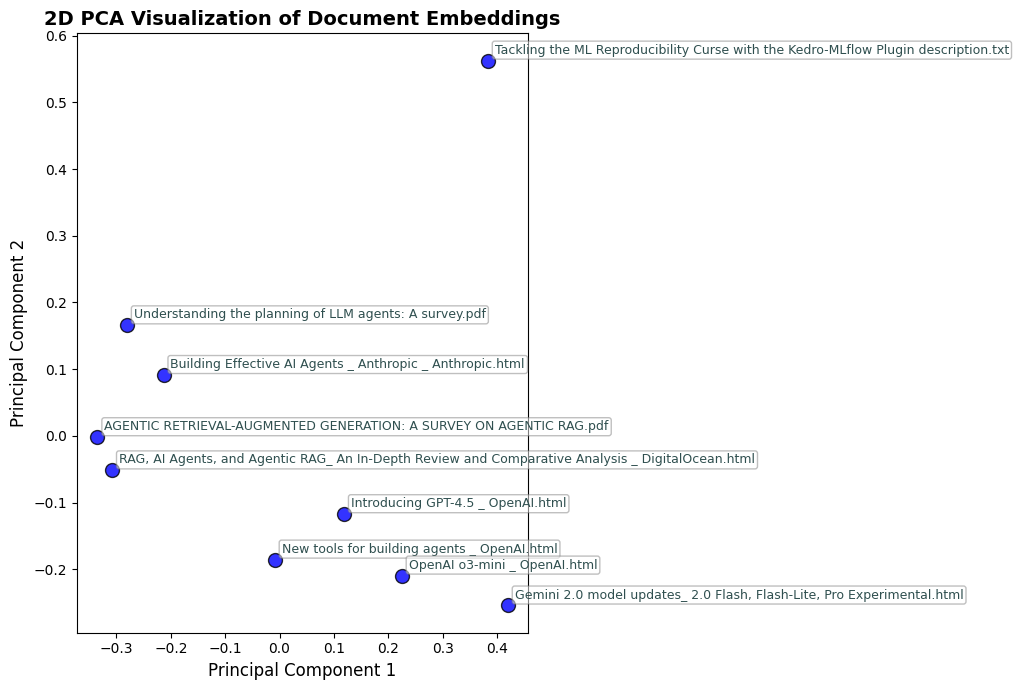

In [135]:
# https://en.wikipedia.org/wiki/Dimensionality_reduction
from sklearn.decomposition import PCA

# Assume `documents` is a list of dicts each with an "embedding" key and metadata "source"
embeddings = np.array(doc_embeddings)
titles = [doc["metadata"]["source"].split('documents/')[-1][:100] for doc in documents]

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Create the figure and axis with an adjusted size
fig, ax = plt.subplots(figsize=(10, 7))

# Create a scatter plot with enhanced markers
scatter = ax.scatter(reduced_embeddings[:, 0],
                     reduced_embeddings[:, 1],
                     s=100,             # marker size
                     c='blue',       # marker color
                     edgecolor='black', # marker border color
                     alpha=0.8)

# Annotate each point with its title, adding a semi-transparent box for clarity
for i, title in enumerate(titles):
    ax.annotate(title, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]),
                textcoords="offset points",
                xytext=(5, 5),
                ha='left',
                fontsize=9,
                fontweight='medium',
                color='darkslategray',
                bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='gray', alpha=0.5))

# Set axis labels and title with a bit more styling
ax.set_xlabel("Principal Component 1", fontsize=12)
ax.set_ylabel("Principal Component 2", fontsize=12)
ax.set_title("2D PCA Visualization of Document Embeddings", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Semantic search

In [138]:
def find_nearest_document_using_embeddings(query, embedder, doc_vectors):
    query_vector = embedder.encode([query])
    # Compute cosine similarity between the query and all document vectors
    similarities = cosine_similarity(query_vector, doc_vectors)
    best_idx = similarities.argmax()
    best_sim = similarities[0, best_idx]
    return best_idx, best_sim

### GPT-4.5 example

In [139]:
best_idx, best_sim = find_nearest_document_using_embeddings("What are the new features presented in GPT-4.5?", embedder=embedding_model, doc_vectors=doc_embeddings)

In [140]:
print("Best matching document index:", best_idx)
print("Similarity score:", best_sim)

Best matching document index: 5
Similarity score: 0.6767011


In [141]:
documents[best_idx]["metadata"]

{'source': 'documents/Introducing GPT-4.5 _ OpenAI.html'}

### Building AI agents from Anthropic example

In [142]:
best_idx, best_sim = find_nearest_document_using_embeddings("Recommendations about how to create AI agents", embedder=embedding_model, doc_vectors=doc_embeddings)
print("Best matching document index:", best_idx)
print("Similarity score:", best_sim)

Best matching document index: 8
Similarity score: 0.70854026


In [143]:
documents[best_idx]["metadata"]

{'source': 'documents/Building Effective AI Agents _ Anthropic _ Anthropic.html'}

works well but as you may have noticed, this scales linearly with the amount of documents in the collection as we compare the query in a brute-force way against every document we have. we'll cover that in the next section

# Vector databases

Vector databases (VDB) are created for optimized storage of embeddings and search over them. The main feature of VDBs is optimized search which we'll cover briefly 

In [163]:
from langchain_huggingface import HuggingFaceEmbeddings

# the same model as we used but with a different interface
embedding_model = HuggingFaceEmbeddings(model_name="nomic-ai/modernbert-embed-base",
                                        model_kwargs={"device": "cpu"},
                                        encode_kwargs={"batch_size": 1})

In [146]:
documents[0]['metadata']

{'source': 'documents/Gemini 2.0 model updates_ 2.0 Flash, Flash-Lite, Pro Experimental.html'}

In [147]:
from uuid import uuid4
from langchain_core.documents import Document

langchain_documents = [Document(
    page_content=d["page_content"],
    metadata=d["metadata"],
) for d in documents
]
uuids = [str(uuid4()) for _ in range(len(langchain_documents))]

## In memory

In [148]:
from langchain_core.vectorstores import InMemoryVectorStore

vector_store = InMemoryVectorStore(embedding_model)

In [149]:
vector_store.add_documents(documents=langchain_documents, ids=uuids)

['1568d07e-9c14-4474-9319-7f06b048fa47',
 '253d23c6-0b1f-4342-98e1-4ab68b777861',
 '115eb7db-3a45-4c1b-94de-5a7b34a1a335',
 '24d5b82a-56fa-41ed-b3c6-d35a5b31a7f9',
 '31da13aa-52e4-4861-951e-47bce27b272b',
 'da86015b-b455-4ead-9d22-43edad109fe5',
 '185e6b3c-900c-47f8-a0e0-8773e14fb218',
 '6c809dc2-153c-4173-9a6c-9533cc0c03eb',
 '38df7185-b0ac-4ba2-b057-1df7fd0038f4']

### Exemplar queries

In [157]:
# uses cosine similarity under the hood
results = vector_store.similarity_search(query="What are the new features presented in GPT-4.5?", k=1)
for doc in results:
    print(f"{doc.metadata}\n{doc.page_content[:1000]}\n")

{'source': 'documents/Introducing GPT-4.5 _ OpenAI.html'}
Introducing GPT-4.5 | OpenAISkip to main contentLog inSwitch toChatGPT(opens in a new window)Sora(opens in a new window)API Platform(opens in a new window)HomeResearch IndexResearch OverviewResearch ResidencyLatest AdvancementsGPT-4.5OpenAI o3-miniOpenAI o1OpenAI o1-miniGPT-4oGPT-4o miniSoraResearchBack to main menuResearch IndexResearch OverviewResearch ResidencyLatest AdvancementsGPT-4.5OpenAI o3-miniOpenAI o1OpenAI o1-miniGPT-4oGPT-4o miniSoraSafetyBack to main menuSafety ApproachSecurity & PrivacyChatGPTBack to main menuExplore ChatGPTTeamEnterpriseEducationPricingDownloadSoraBack to main menuSora OverviewFeaturesPricingHelp center(opens in a new window)Sora log in(opens in a new window)API PlatformBack to main menuPlatform OverviewPricingAPI Log in(opens in a new window)Documentation(opens in a new window)Developer Forum(opens in a new window)For BusinessStoriesCompanyBack to main menuAbout usOur CharterCareersBrandOverview

In [158]:
results = vector_store.similarity_search_with_score(query="What are the new features presented in GPT-4.5?", k=1)
for doc, score in results:
    print(f"{doc.metadata} with score {score:.2f}\n{doc.page_content[:1000]}\n")

{'source': 'documents/Introducing GPT-4.5 _ OpenAI.html'} with score 0.68
Introducing GPT-4.5 | OpenAISkip to main contentLog inSwitch toChatGPT(opens in a new window)Sora(opens in a new window)API Platform(opens in a new window)HomeResearch IndexResearch OverviewResearch ResidencyLatest AdvancementsGPT-4.5OpenAI o3-miniOpenAI o1OpenAI o1-miniGPT-4oGPT-4o miniSoraResearchBack to main menuResearch IndexResearch OverviewResearch ResidencyLatest AdvancementsGPT-4.5OpenAI o3-miniOpenAI o1OpenAI o1-miniGPT-4oGPT-4o miniSoraSafetyBack to main menuSafety ApproachSecurity & PrivacyChatGPTBack to main menuExplore ChatGPTTeamEnterpriseEducationPricingDownloadSoraBack to main menuSora OverviewFeaturesPricingHelp center(opens in a new window)Sora log in(opens in a new window)API PlatformBack to main menuPlatform OverviewPricingAPI Log in(opens in a new window)Documentation(opens in a new window)Developer Forum(opens in a new window)For BusinessStoriesCompanyBack to main menuAbout usOur CharterCare

In [162]:
results = vector_store.similarity_search_with_score(query="OpenAI new model?", k=2)
for doc, score in results:
    print(f"{doc.metadata} with score {score:.2f}\n{doc.page_content[:200]}\n")

{'source': 'documents/OpenAI o3-mini _ OpenAI.html'} with score 0.63
OpenAI o3-mini | OpenAISkip to main contentLog inSwitch toChatGPT(opens in a new window)Sora(opens in a new window)API Platform(opens in a new window)HomeResearch IndexResearch OverviewResearch Reside

{'source': 'documents/New tools for building agents _ OpenAI.html'} with score 0.60
New tools for building agents | OpenAISkip to main contentLog inSwitch toChatGPT(opens in a new window)Sora(opens in a new window)API Platform(opens in a new window)ResearchSafetyChatGPTSoraAPI Platfo



## FAISS

Optimized C++ Backend

In [165]:
from langchain_community.vectorstores import FAISS
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore

index = faiss.IndexFlatL2(len(embedding_model.embed_query("get embedding dim")))

vector_store = FAISS(
    embedding_function=embedding_model,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)
vector_store.add_documents(documents=langchain_documents, ids=uuids)

['1568d07e-9c14-4474-9319-7f06b048fa47',
 '253d23c6-0b1f-4342-98e1-4ab68b777861',
 '115eb7db-3a45-4c1b-94de-5a7b34a1a335',
 '24d5b82a-56fa-41ed-b3c6-d35a5b31a7f9',
 '31da13aa-52e4-4861-951e-47bce27b272b',
 'da86015b-b455-4ead-9d22-43edad109fe5',
 '185e6b3c-900c-47f8-a0e0-8773e14fb218',
 '6c809dc2-153c-4173-9a6c-9533cc0c03eb',
 '38df7185-b0ac-4ba2-b057-1df7fd0038f4']

In [166]:
results = vector_store.similarity_search_with_score(query="OpenAI new model?", k=2)
for doc, score in results:
    print(f"{doc.metadata} with score {score:.2f}\n{doc.page_content[:200]}\n")

{'source': 'documents/OpenAI o3-mini _ OpenAI.html'} with score 0.75
OpenAI o3-mini | OpenAISkip to main contentLog inSwitch toChatGPT(opens in a new window)Sora(opens in a new window)API Platform(opens in a new window)HomeResearch IndexResearch OverviewResearch Reside

{'source': 'documents/New tools for building agents _ OpenAI.html'} with score 0.79
New tools for building agents | OpenAISkip to main contentLog inSwitch toChatGPT(opens in a new window)Sora(opens in a new window)API Platform(opens in a new window)ResearchSafetyChatGPTSoraAPI Platfo



Brute-force search scales linearly with the number of vectors (N) and the vector dimensionality (d), making it infeasible for large datasets.

More about nearest neighbour search: https://en.wikipedia.org/wiki/Nearest_neighbor_search

Recommended to study about approximate nearest neighbours search: 
* https://github.com/facebookresearch/faiss/wiki/Faiss-indexes
* https://medium.com/data-science/comprehensive-guide-to-approximate-nearest-neighbors-algorithms-8b94f057d6b6

# Semantic RAG

In [167]:
prompt = """
You are an intelligent assistant that can help me find information in my documents.
This is the query from the user:
{user_query}

Below is the list of document names and their contents retrieved by the vector search:
{document_list_as_a_string}
"""

In [168]:
def semantic_rag_chain(query, prompt, llm, k=1):
    results = vector_store.similarity_search(query=query, k=k)
    print(f"Retrieved documents: {[r.metadata['source'] for r in results]}")
    document_list_as_a_string = "\n\n\n".join([f"Document source: {doc.metadata['source']}\nDocument content: {doc.page_content}" for doc in results])
    formatted_prompt = prompt.format(user_query=query, document_list_as_a_string=document_list_as_a_string)
    response = get_chat_response(llm, formatted_prompt)
    return response

In [169]:
query = "What are the new features presented in GPT-4.5? Answer shortly"
response = semantic_rag_chain(query, prompt, llm)
print(response)

Retrieved documents: ['documents/Introducing GPT-4.5 _ OpenAI.html']
The new features in GPT-4.5 include:

1. **Improved Natural Interaction**: Interactions feel more natural with better understanding of user intent and emotional intelligence (EQ).
2. **Broader Knowledge Base**: Enhanced accuracy and reliability due to scaling unsupervised learning.
3. **Reduced Hallucinations**: Lower incidence of generating incorrect or fabricated information.
4. **Enhanced Creativity and Aesthetic Intuition**: Stronger abilities in writing, design, and problem-solving.
5. **Training for Human Collaboration**: Improved steerability and nuance recognition for natural conversations.

Overall, GPT-4.5 represents significant advancements in AI capabilities, particularly in unsupervised learning and user engagement.


In [170]:
query = "What are the new models introduced by OpenAI? Answer shortly"
response = semantic_rag_chain(query, prompt, llm, k=2)
print(response)

Retrieved documents: ['documents/OpenAI o3-mini _ OpenAI.html', 'documents/New tools for building agents _ OpenAI.html']
OpenAI recently introduced several new models, including:

1. **GPT-4.5**
2. **OpenAI o3-mini** - a cost-effective model optimized for STEM reasoning with advanced capabilities such as function calling and structured outputs.
3. **OpenAI o1** and **OpenAI o1-mini** - along with their predecessors like GPT-4 and GPT-4o mini.

The o3-mini model aims to enhance performance in tasks involving science, math, and coding while being production-ready with various developer features.


As for the frameworks, I was always using LangChain for such applications but I see some shift in the industry against locking yourself at early stages so that you can freely prototype without studying **rapidly changing** tools.

## Further readings

Metadata filtering: https://python.langchain.com/docs/concepts/vectorstores/#metadata-filtering

Hybrid search: 
1. https://docs.onyx.app/system_overview#query-flow
1. https://python.langchain.com/docs/integrations/retrievers/pinecone_hybrid_search/  

Diversity in retrieval: https://www.kaggle.com/code/marcinrutecki/rag-mmr-search-in-langchain

HyDE: https://aclanthology.org/2023.acl-long.99.pdf

LangChain course from James Briggs: https://youtu.be/Cyv-dgv80kE?si=ZPn7K8WrKKxu9tMQ

LLM for querying your database: https://python.langchain.com/docs/how_to/self_query/

Re-Ranking: https://medium.com/@ashpaklmulani/improve-retrieval-augmented-generation-rag-with-re-ranking-31799c670f8e

Graph RAG: https://microsoft.github.io/graphrag/

# Agents and AI agents

Agent definition: https://www.merriam-webster.com/dictionary/agent  

AI agent definitions: 
1. HF: https://huggingface.co/learn/agents-course/en/unit1/what-are-agents#lets-go-more-formal
1. AWS: https://aws.amazon.com/what-is/ai-agents/

Core components: https://weaviate.io/blog/what-is-agentic-rag#what-are-agents-in-ai-systems

# Agentic RAG: connecting agents and retrieval

There is no set in stone taxonomy or classification or recipe of how to build agents. Sometimes you can find the following terms: 
* Techniques for making agents
* Paradigms for making agents
* Agentic patterns
* Frameworks (!= software frameworks)

## ReAct (manual)

In [171]:
def retrieval(query: str) -> str:
    print(f"Querying with: '{query}'")
    results = vector_store.similarity_search(query=query, k=1)
    print(f"Retrieved documents: {[r.metadata['source'] for r in results]}")
    document_list_as_a_string = "\n\n\n".join([f"Document source: {doc.metadata['source']}\nDocument content: {doc.page_content}" for doc in results])
    return document_list_as_a_string

In [172]:
retrieval("What are the new features presented in GPT-4.5? Answer shortly")[:1000]

Querying with: 'What are the new features presented in GPT-4.5? Answer shortly'
Retrieved documents: ['documents/Introducing GPT-4.5 _ OpenAI.html']


'Document source: documents/Introducing GPT-4.5 _ OpenAI.html\nDocument content: Introducing GPT-4.5 | OpenAISkip to main contentLog inSwitch toChatGPT(opens in a new window)Sora(opens in a new window)API Platform(opens in a new window)HomeResearch IndexResearch OverviewResearch ResidencyLatest AdvancementsGPT-4.5OpenAI o3-miniOpenAI o1OpenAI o1-miniGPT-4oGPT-4o miniSoraResearchBack to main menuResearch IndexResearch OverviewResearch ResidencyLatest AdvancementsGPT-4.5OpenAI o3-miniOpenAI o1OpenAI o1-miniGPT-4oGPT-4o miniSoraSafetyBack to main menuSafety ApproachSecurity & PrivacyChatGPTBack to main menuExplore ChatGPTTeamEnterpriseEducationPricingDownloadSoraBack to main menuSora OverviewFeaturesPricingHelp center(opens in a new window)Sora log in(opens in a new window)API PlatformBack to main menuPlatform OverviewPricingAPI Log in(opens in a new window)Documentation(opens in a new window)Developer Forum(opens in a new window)For BusinessStoriesCompanyBack to main menuAbout usOur Char

In [173]:
def parse_response(response: str) -> dict:
    """
    Parse the agent's response to extract the action and its argument.
    
    Expected formats in the response:
    
    Case 1 (Tool Call):
        Thought: some internal thoughts...
        Action: tool_name: tool_text_args
        
    Case 2 (Finishing):
        Thought: some internal thoughts...
        Action: Finish: llm_final_textual_response
        
    Returns a dictionary with:
      - "action_type": either the tool name (e.g., "retrieval") or "finish"
      - "argument": the argument text for the action
    If no action line is found, returns None.
    """
    # Split the response into individual lines.
    for line in response.splitlines():
        if line.strip().startswith("Action:"):
            # Remove the "Action:" prefix and any leading/trailing whitespace.
            action_line = line.strip()[len("Action:"):].strip()
            # Expect a colon separator between the action name and argument.
            if ":" not in action_line:
                raise ValueError("Invalid action format: missing ':' separator.")
            
            tool_name, arg = action_line.split(":", 1)
            tool_name = tool_name.strip().lower()
            arg = arg.strip()
            
            if tool_name == "finish":
                return {"action_type": "finish", "argument": arg}
            else:
                return {"action_type": tool_name, "argument": arg}
    
    # If no action is found, return None.
    return None

In [174]:
response1 = """Thought: I need to find documents related to machine learning.
Action: retrieval: machine learning in healthcare"""

parse_response(response1)

{'action_type': 'retrieval', 'argument': 'machine learning in healthcare'}

In [175]:
response2 = """Thought: I have gathered all the required info.
Action: Finish: The final answer is that machine learning improves diagnostic accuracy."""

parse_response(response2)

{'action_type': 'finish',
 'argument': 'The final answer is that machine learning improves diagnostic accuracy.'}

In [177]:
def process_agent_response(response: str) -> tuple[bool, str]:
    """
    Process the agent's response to execute the requested tool call
    or finish with the final answer.
    
    Returns a tuple (finished, next_prompt_or_answer):
      - If finished is True, next_prompt_or_answer contains the final answer.
      - Otherwise, it contains the Observation text to be appended to the next prompt.
    """
    parsed = parse_response(response)
    if not parsed:
        # No action found; return the raw response.
        return False, response

    if parsed["action_type"] == "finish":
        # The agent is done; return its final answer.
        return True, parsed["argument"]
    elif parsed["action_type"] == "retrieval":
        # Execute the retrieval tool.
        observation = retrieval(parsed["argument"])
        return False, f"Observation: {observation}"
    else:
        # If the tool is not recognized, we generate a fallback Observation.
        return False, "Observation: Tool not recognized"

In [178]:
response_tool = (
    "Thought: I need to find relevant documents on GPT-4.5.\n"
    "Action: retrieval: GPT-4.5 new features"
)
finished, next_prompt = process_agent_response(response_tool)
print("Finished:", finished)
print("Next Prompt:")
print(next_prompt[:1000])

Querying with: 'GPT-4.5 new features'
Retrieved documents: ['documents/Introducing GPT-4.5 _ OpenAI.html']
Finished: False
Next Prompt:
Observation: Document source: documents/Introducing GPT-4.5 _ OpenAI.html
Document content: Introducing GPT-4.5 | OpenAISkip to main contentLog inSwitch toChatGPT(opens in a new window)Sora(opens in a new window)API Platform(opens in a new window)HomeResearch IndexResearch OverviewResearch ResidencyLatest AdvancementsGPT-4.5OpenAI o3-miniOpenAI o1OpenAI o1-miniGPT-4oGPT-4o miniSoraResearchBack to main menuResearch IndexResearch OverviewResearch ResidencyLatest AdvancementsGPT-4.5OpenAI o3-miniOpenAI o1OpenAI o1-miniGPT-4oGPT-4o miniSoraSafetyBack to main menuSafety ApproachSecurity & PrivacyChatGPTBack to main menuExplore ChatGPTTeamEnterpriseEducationPricingDownloadSoraBack to main menuSora OverviewFeaturesPricingHelp center(opens in a new window)Sora log in(opens in a new window)API PlatformBack to main menuPlatform OverviewPricingAPI Log in(opens in

In [179]:
response_finish = (
    "Thought: I've gathered all necessary information.\n"
    "Action: Finish: The final answer is that GPT-4.5 is better than GPT-4 by 0.5."
)
finished, final_answer = process_agent_response(response_finish)
print("Finished:", finished)
print("Final Answer:", final_answer)

Finished: True
Final Answer: The final answer is that GPT-4.5 is better than GPT-4 by 0.5.


In [187]:
# Define a system prompt template with placeholders.
system_prompt_template = """
You are a helpful AI agent specialized in question answering.
Here is the original user's query:
'{query}'

You have access to the 'retrieval' tool which can search over several recent documents about AI
and also some user's documents. 

When given a query, decide whether you need to retrieve additional documents.
If you require more context, respond with an action instruction in the exact format:
Thought: <your internal thoughts>
Action: retrieval: <your retrieval query>

Otherwise, when you have enough information, provide a final answer in the format:
Thought: <your internal thoughts>
Action: Finish: <your final answer>



Below is your workplace:
{react_accumulated}
"""

# Agent call that builds the full prompt.
def agent_call(original_query: str, react_accumulated: str, llm) -> str:
    full_prompt = system_prompt_template.format(
        query=original_query,
        react_accumulated=react_accumulated
    )
    # print(full_prompt)
    return get_chat_response(llm, full_prompt)

In [183]:
response = agent_call(original_query="What's in my youtube script about kedro?", react_accumulated="", llm=llm)


You are a helpful AI agent specialized in question answering.
Here is the original user's query:
'What's in my youtube script about kedro?'

You have access to the 'retrieval' tool which can search over several recent documents about AI
and also some user's documents. 

When given a query, decide whether you need to retrieve additional documents.
If you require more context, respond with an action instruction in the exact format:
Thought: <your internal thoughts>
Action: retrieval: <your retrieval query>

Otherwise, when you have enough information, provide a final answer in the format:
Thought: <your internal thoughts>
Action: Finish: <your final answer>



Below is your workplace:




In [ ]:
print(response)

Thought: I don't have direct access to the user's script about Kedro, nor do I have contextual information about the contents of that script. To adequately respond to the query, I need to retrieve specific documents that could provide insight into what a typical script about Kedro might contain or focus on. 
Action: retrieval: "Kedro YouTube script overview"


let's simulate the situation when we didn't find the document

In [185]:
react_accumulated = """Thought: I don't have direct access to the user's script about Kedro, nor do I have contextual information about the contents of that script. To adequately respond to the query, I need to retrieve specific documents that could provide insight into what a typical script about Kedro might contain or focus on. 
Action: retrieval: "Kedro YouTube script overview"
Observation: no document found
"""
print(react_accumulated)

Thought: I don't have direct access to the user's script about Kedro, nor do I have contextual information about the contents of that script. To adequately respond to the query, I need to retrieve specific documents that could provide insight into what a typical script about Kedro might contain or focus on. 
Action: retrieval: "Kedro YouTube script overview"
Observation: no document found



In [186]:
response = agent_call(original_query="What's in my youtube script about kedro?", 
                      react_accumulated=react_accumulated, 
                      llm=llm)
print(response)


You are a helpful AI agent specialized in question answering.
Here is the original user's query:
'What's in my youtube script about kedro?'

You have access to the 'retrieval' tool which can search over several recent documents about AI
and also some user's documents. 

When given a query, decide whether you need to retrieve additional documents.
If you require more context, respond with an action instruction in the exact format:
Thought: <your internal thoughts>
Action: retrieval: <your retrieval query>

Otherwise, when you have enough information, provide a final answer in the format:
Thought: <your internal thoughts>
Action: Finish: <your final answer>



Below is your workplace:
Thought: I don't have direct access to the user's script about Kedro, nor do I have contextual information about the contents of that script. To adequately respond to the query, I need to retrieve specific documents that could provide insight into what a typical script about Kedro might contain or focus on

In [188]:
def react_loop(max_iterations=5, initial_query: str = "", llm: ChatOpenAI | None = None) -> str:
    """
    Orchestrates the ReAct loop.
    
    The loop starts with an initial_query and repeatedly calls agent_call.
    It updates the accumulated workplace by appending:
      - The agent's response (including Thought and Action).
      - The resulting Observation.
    
    When the agent outputs a finishing action ("Finish"), the loop stops.
    Returns the final answer.
    """
    react_accumulated = ""

    for i in range(max_iterations):
        print(f"Iteration {i+1}:")
        # Call the agent with the current workplace.
        agent_response = agent_call(original_query=initial_query, react_accumulated=react_accumulated, llm=llm)
        print("Agent Response:")
        print(agent_response)
        print("-" * 20)
        
        # Append the agent's response to the workplace.
        react_accumulated += "\n" + agent_response
        
        finished, next_content = process_agent_response(agent_response)
        # Append the observation (or final answer) to the workplace.
        react_accumulated += "\n" + next_content
        
        if finished:
            print("Final Answer:")
            print(next_content)
            return next_content
        else:
            print("Updated Workplace:")
            print(react_accumulated)
            print("=" * 50)
    
    print("Max iterations reached without final answer.")
    return react_accumulated

In [189]:
response = react_loop(max_iterations=5, initial_query="What are rainbow colours?", llm=llm)

Iteration 1:
Agent Response:
Thought: The user is asking about the colors of a rainbow, which are well-known and typically represented as red, orange, yellow, green, blue, indigo, and violet (often abbreviated as ROYGBIV). I have sufficient information to provide a complete answer without needing to retrieve additional documents. 
Action: Finish: The colors of a rainbow are red, orange, yellow, green, blue, indigo, and violet. These colors can be remembered using the acronym ROYGBIV.
--------------------
Final Answer:
The colors of a rainbow are red, orange, yellow, green, blue, indigo, and violet. These colors can be remembered using the acronym ROYGBIV.


In [190]:
response = react_loop(max_iterations=5, initial_query="What's in my youtube script about kedro?", llm=llm)

Iteration 1:
Agent Response:
Thought: The user's query indicates they want information about their YouTube script regarding "kedro." However, there are no details in the query about the content or specific topics covered in the script. I need more context to provide an accurate answer. 
Action: retrieval: "YouTube script about kedro"
--------------------
Querying with: '"YouTube script about kedro"'
Retrieved documents: ['documents/Tackling the ML Reproducibility Curse with the Kedro-MLflow Plugin description.txt']
Updated Workplace:

Thought: The user's query indicates they want information about their YouTube script regarding "kedro." However, there are no details in the query about the content or specific topics covered in the script. I need more context to provide an accurate answer. 
Action: retrieval: "YouTube script about kedro"
Observation: Document source: documents/Tackling the ML Reproducibility Curse with the Kedro-MLflow Plugin description.txt
Document content: Dive into t

In [191]:
response = react_loop(max_iterations=5, initial_query="What are the features of the new GPT-4.5 model?", llm=llm)

Iteration 1:
Agent Response:
Thought: I need to gather the latest information about the features of the GPT-4.5 model, as I don't currently have that specific data. The user has asked for details about a newer version of the model, which suggests a need for up-to-date information. 
Action: retrieval: "features of GPT-4.5 model"
--------------------
Querying with: '"features of GPT-4.5 model"'
Retrieved documents: ['documents/Introducing GPT-4.5 _ OpenAI.html']
Updated Workplace:

Thought: I need to gather the latest information about the features of the GPT-4.5 model, as I don't currently have that specific data. The user has asked for details about a newer version of the model, which suggests a need for up-to-date information. 
Action: retrieval: "features of GPT-4.5 model"
Observation: Document source: documents/Introducing GPT-4.5 _ OpenAI.html
Document content: Introducing GPT-4.5 | OpenAISkip to main contentLog inSwitch toChatGPT(opens in a new window)Sora(opens in a new window)AP

## ReAct LangChain

Tutorial: https://python.langchain.com/docs/tutorials/agents/

In [195]:
from langchain_core.messages import HumanMessage

In [197]:
response = llm.invoke([HumanMessage(content="What is your knowledge cutoff")])
response.content

'My knowledge cutoff is in October 2021. I do not have information or updates beyond that date. If you have questions or need information relevant to that time or prior, feel free to ask!'

In [200]:
retriever = vector_store.as_retriever(search_kwargs={"k": 1})
retrieval_tool = retriever.as_tool(name="local_document_retriever",
                                   description="Tool which can perform semantic search over several recent documents about AI and also some user's documents. To query, provide a sentence with the meaning of a document you expect to find")
retrieval_tool

Tool(name='local_document_retriever', description="Tool which can perform semantic search over several recent documents about AI and also some user's documents. To query, provide a sentence with the meaning of a document you expect to find", func=<bound method BaseRetriever.invoke of VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x3363487d0>, search_kwargs={'k': 1})>, coroutine=<bound method BaseRetriever.ainvoke of VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x3363487d0>, search_kwargs={'k': 1})>)

In [201]:
tools = [retrieval_tool]
model_with_tools = llm.bind_tools(tools)
model_with_tools

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x1373f5d10>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x1373fe510>, root_client=<openai.OpenAI object at 0x136ced950>, root_async_client=<openai.AsyncOpenAI object at 0x136d4e270>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'local_document_retriever', 'description': "Tool which can perform semantic search over several recent documents about AI and also some user's documents. To query, provide a sentence with the meaning of a document you expect to find", 'parameters': {'properties': {'__arg1': {'title': '__arg1', 'type': 'string'}}, 'required': ['__arg1'], 'type': 'object'}}}]}, config={}, config_factories=[])

In [202]:
response = model_with_tools.invoke([HumanMessage(content="Hi!")])

print(f"ContentString: {response.content}")
print(f"ToolCalls: {response.tool_calls}")

ContentString: Hello! How can I assist you today?
ToolCalls: []


In [203]:
response = model_with_tools.invoke([HumanMessage(content="What's in my youtube script about kedro?")])

print(f"ContentString: {response.content}")
print(f"ToolCalls: {response.tool_calls}")

ContentString: 
ToolCalls: [{'name': 'local_document_retriever', 'args': {'__arg1': 'YouTube script about Kedro'}, 'id': 'call_IfIJu5xXFuOoMeMzAh9mVuRU', 'type': 'tool_call'}]


you can see that we are trying to invoke the tool as previously! but with a bit different interface

In [204]:
from langgraph.prebuilt import create_react_agent
# Note that we are passing in the model, not model_with_tools. That is because create_react_agent will call .bind_tools for us under the hood.
agent_executor = create_react_agent(llm, tools)

In [206]:
response = agent_executor.invoke({"messages": [HumanMessage(content="hi!")]})
response["messages"]

[HumanMessage(content='hi!', additional_kwargs={}, response_metadata={}, id='d1189de0-303a-41c6-b01f-845f9bcb8276'),
 AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 84, 'total_tokens': 95, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_e4fa3702df', 'id': 'chatcmpl-BDugp0M4PrJRuEyU9nWCfIDkvRQDp', 'finish_reason': 'stop', 'logprobs': None}, id='run-5d32b86a-910f-4810-a102-c7d954c8348c-0', usage_metadata={'input_tokens': 84, 'output_tokens': 11, 'total_tokens': 95, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]

In [207]:
response = agent_executor.invoke(
    {"messages": [HumanMessage(content="What are the chapters in my youtube script about kedro??")]}
)

In [208]:
len(response["messages"])

4

In [209]:
response["messages"][0]

HumanMessage(content='What are the chapters in my youtube script about kedro??', additional_kwargs={}, response_metadata={}, id='13956518-be57-46e7-81e7-eb356187f094')

In [210]:
response["messages"][1].tool_calls

[{'name': 'local_document_retriever',
  'args': {'__arg1': 'youtube script about kedro chapters'},
  'id': 'call_opVZ0ckG0XkzZroaLXhGxysC',
  'type': 'tool_call'}]

In [211]:
response["messages"][2]

ToolMessage(content="[Document(id='115eb7db-3a45-4c1b-94de-5a7b34a1a335', metadata={'source': 'documents/Tackling the ML Reproducibility Curse with the Kedro-MLflow Plugin description.txt'}, page_content='Dive into the power of the Kedro-MLflow plugin — a seamless integration of Kedro’s robust pipeline management with MLflow’s comprehensive experiment tracking and model registry. In this video, we explore how combining these two frameworks can resolve the reproducibility challenges that often plague modern ML solutions.\\n\\nChapters:\\n00:00 – Introduction\\n01:29 – Use-Case Study: The Spaceflights Tutorial\\n05:49 – Solution Pipeline Overview\\n11:03 – Defining the Reproducibility Problem\\n14:21 – Exploring Kedro-viz\\n19:40 – Kedro Project Structure\\n23:37 – Deep Dive: ETL Application\\n27:17 – Deep Dive: ML Application\\n27:44 – Kedro-MLflow Plugin in Action\\n37:43 – Advanced Usage: Pipeline as a Model\\n39:43 – Testing the Inference Pipeline\\n48:42 – Kedro Context in Jupyter N

In [213]:
print(response["messages"][3].content)

The chapters in your YouTube script about Kedro are as follows:

1. **00:00 – Introduction**
2. **01:29 – Use-Case Study: The Spaceflights Tutorial**
3. **05:49 – Solution Pipeline Overview**
4. **11:03 – Defining the Reproducibility Problem**
5. **14:21 – Exploring Kedro-viz**
6. **19:40 – Kedro Project Structure**
7. **23:37 – Deep Dive: ETL Application**
8. **27:17 – Deep Dive: ML Application**
9. **27:44 – Kedro-MLflow Plugin in Action**
10. **37:43 – Advanced Usage: Pipeline as a Model**
11. **39:43 – Testing the Inference Pipeline**
12. **48:42 – Kedro Context in Jupyter Notebook**
13. **56:21 – Conclusion**

Let me know if you need more details on any specific chapter!


### Multi-step

In [215]:
response = agent_executor.invoke(
    {"messages": [HumanMessage(content="Compare the new features of GPT-4.5 and o3-mini. Both are from OpenAI")]}
)

In [216]:
len(response["messages"])

5

In [217]:
response["messages"][1].tool_calls

[{'name': 'local_document_retriever',
  'args': {'__arg1': 'features of GPT-4.5 compared to earlier versions like GPT-4'},
  'id': 'call_KTsC3mVqHL7ucz5U68aFjdkq',
  'type': 'tool_call'},
 {'name': 'local_document_retriever',
  'args': {'__arg1': 'features of OpenAI o3-mini'},
  'id': 'call_SCjdhdyB1Zbf7NNCps4saMXc',
  'type': 'tool_call'}]

In [218]:
type(response["messages"][2]), response["messages"][2].content[:1000]

(langchain_core.messages.tool.ToolMessage,
 "[Document(id='da86015b-b455-4ead-9d22-43edad109fe5', metadata={'source': 'documents/Introducing GPT-4.5 _ OpenAI.html'}, page_content='Introducing GPT-4.5 | OpenAISkip to main contentLog inSwitch toChatGPT(opens in a new window)Sora(opens in a new window)API Platform(opens in a new window)HomeResearch IndexResearch OverviewResearch ResidencyLatest AdvancementsGPT-4.5OpenAI o3-miniOpenAI o1OpenAI o1-miniGPT-4oGPT-4o miniSoraResearchBack to main menuResearch IndexResearch OverviewResearch ResidencyLatest AdvancementsGPT-4.5OpenAI o3-miniOpenAI o1OpenAI o1-miniGPT-4oGPT-4o miniSoraSafetyBack to main menuSafety ApproachSecurity & PrivacyChatGPTBack to main menuExplore ChatGPTTeamEnterpriseEducationPricingDownloadSoraBack to main menuSora OverviewFeaturesPricingHelp center(opens in a new window)Sora log in(opens in a new window)API PlatformBack to main menuPlatform OverviewPricingAPI Log in(opens in a new window)Documentation(opens in a new windo

In [219]:
type(response["messages"][3]), response["messages"][3].content[:1000]

(langchain_core.messages.tool.ToolMessage,
 '[Document(id=\'185e6b3c-900c-47f8-a0e0-8773e14fb218\', metadata={\'source\': \'documents/OpenAI o3-mini _ OpenAI.html\'}, page_content="OpenAI o3-mini | OpenAISkip to main contentLog inSwitch toChatGPT(opens in a new window)Sora(opens in a new window)API Platform(opens in a new window)HomeResearch IndexResearch OverviewResearch ResidencyLatest AdvancementsGPT-4.5OpenAI o3-miniOpenAI o1OpenAI o1-miniGPT-4oGPT-4o miniSoraResearchBack to main menuResearch IndexResearch OverviewResearch ResidencyLatest AdvancementsGPT-4.5OpenAI o3-miniOpenAI o1OpenAI o1-miniGPT-4oGPT-4o miniSoraSafetyBack to main menuSafety ApproachSecurity & PrivacyChatGPTBack to main menuExplore ChatGPTTeamEnterpriseEducationPricingDownloadSoraBack to main menuSora OverviewFeaturesPricingHelp center(opens in a new window)Sora log in(opens in a new window)API PlatformBack to main menuPlatform OverviewPricingAPI Log in(opens in a new window)Documentation(opens in a new window)De

In [220]:
print(response["messages"][4].content)

Here’s a comparative overview of the new features of GPT-4.5 and OpenAI o3-mini based on the recent documents from OpenAI:

### GPT-4.5 Features
1. **Scaling Knowledge and Reasoning**:
   - **Enhancements in Unsupervised Learning**: GPT-4.5 utilizes improved pre-training methods to scale its unsupervised learning capabilities. This results in better pattern recognition and creative insight generation.
   - **Natural Conversational Abilities**: Interactions with GPT-4.5 are described as feeling more natural, with an improved ability to follow user intent and demonstrate emotional awareness (EQ).

2. **Capacity and Reliability**:
   - **Knowledge Base Expansion**: The model exhibits broader knowledge and a deeper understanding of various subjects, resulting in reduced instances of hallucination (off-base or incorrect responses).

3. **Training Methodology**:
   - Integration of new training techniques to enhance human collaboration, enabling the model to be more responsive to nuanced use

Agent architectures from langchain: https://langchain-ai.github.io/langgraph/concepts/agentic_concepts/#react-implementation  
Reflexion technique: https://langchain-ai.github.io/langgraph/tutorials/reflexion/reflexion/#revision   
Andrej Karpathy about tool usage in LLMs via special tokens: https://youtu.be/7xTGNNLPyMI?si=WOubv1lHz7YbN_uA&t=5613

# Multi-Agent RAG

Let's assume that our document collection requires a split. And each collection is stored in it's own vector index. Each index is wrapped into a tool. Let's also assume that these tools are so complicated that one agent will not be able to handle two at a time. What if we have two agents each of them is a expert of dealing with its own tool.

https://langchain-ai.github.io/langgraph/tutorials/multi_agent/agent_supervisor/

In [222]:
file_paths = ["calculus_scripts/" + file for file in os.listdir("calculus_scripts")]
calculus_scripts = load_documents(file_paths)
len(documents)

9

In [223]:
langchain_calculus_documents = [Document(
    page_content=d["page_content"],
    metadata=d["metadata"],
) for d in calculus_scripts
]
uuids = [str(uuid4()) for _ in range(len(langchain_calculus_documents))]

In [224]:
index = faiss.IndexFlatL2(len(embedding_model.embed_query("get embedding dim")))

calculus_vector_store = FAISS(
    embedding_function=embedding_model,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)
calculus_vector_store.add_documents(documents=langchain_calculus_documents, ids=uuids)

['4c64c135-e9a7-4305-bfac-159f21fc634c',
 '764c0761-3231-4284-bb77-bd4044eadd32',
 '760f2b2c-f6ed-4d1e-999d-ddd1b3f17269',
 'e33d5733-c0ce-43cf-a12f-11a7ee65f148',
 '17bd86dc-88b4-45e8-b683-54a1d7be9a8f',
 '02fc1093-62fc-4074-a4bf-af3fdf97b05b']

In [225]:
calculus_retriever = calculus_vector_store.as_retriever(search_kwargs={"k": 1})
calculus_documents_tool = calculus_retriever.as_tool(name="local_calculus_document_retriever",
                                                     description="Tool which can perform semantic search only over descriptions of my calculus videos on YouTube. To query, provide a sentence with the meaning of a document you expect to find. It's important to use precise terms related to calculus.")
calculus_documents_tool

Tool(name='local_calculus_document_retriever', description="Tool which can perform semantic search only over descriptions of my calculus videos on YouTube. To query, provide a sentence with the meaning of a document you expect to find. It's important to use precise terms related to calculus.", func=<bound method BaseRetriever.invoke of VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x321c66490>, search_kwargs={'k': 1})>, coroutine=<bound method BaseRetriever.ainvoke of VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x321c66490>, search_kwargs={'k': 1})>)

In [ ]:
from typing import Literal
from typing_extensions import TypedDict

from langgraph.graph import MessagesState, END, StateGraph, START
from langgraph.types import Command


members = ["common_document_retriever", "calculus_document_retriever"]
# Our team supervisor is an LLM node. It just picks the next agent to process
# and decides when the work is completed
options = members + ["FINISH"]

system_prompt = (
    "You are a supervisor tasked with managing a conversation between the"
    f" following workers: {members}. Given the following user request,"
    " respond with the worker to act next. Each worker will perform a"
    " task and respond with their results and status. When finished,"
    " respond with FINISH."
)


class Router(TypedDict):
    """Worker to route to next. If no workers needed, route to FINISH."""

    next: Literal[*options]

In [227]:
Literal[*options]

typing.Literal['common_document_retriever', 'calculus_document_retriever', 'FINISH']

In [228]:
messages = [
    {"role": "user", "content": "I probably have to query the calculus database"}
]
llm.with_structured_output(Router).invoke(messages)

{'next': 'calculus_document_retriever'}

In [229]:
messages = [
    {"role": "user", "content": "I probably have to query the common database"}
]
llm.with_structured_output(Router).invoke(messages)

{'next': 'common_document_retriever'}

In [230]:
messages = [
    {"role": "user", "content": "Here is the final answer: do some vibe coding."}
]
llm.with_structured_output(Router).invoke(messages)

{'next': 'FINISH'}

In [231]:
class State(MessagesState):
    next: str


def supervisor_node(state: State) -> Command[Literal[*members, "__end__"]]:
    messages = [
        {"role": "system", "content": system_prompt},
    ] + state["messages"]
    response = llm.with_structured_output(Router).invoke(messages)
    goto = response["next"]
    if goto == "FINISH":
        goto = END

    return Command(goto=goto, update={"next": goto})

In [257]:
# the same func we used in the ReAct LangChain section
document_agent = create_react_agent(
    llm, tools=[retrieval_tool], prompt="You are an expert in a semantic search over various kind or articles about AI and other documents including even generic YouTube video descriptions. Do not ask the tool about what you do not expect to find in the documents. Do not use the tool more than once if not needed."
)

def document_node(state: State) -> Command[Literal["supervisor"]]:
    result = document_agent.invoke(state)
    return Command(
        update={
            "messages": [
                # simulating agents communication with each other
                HumanMessage(content=result["messages"][-1].content, name="common_document_retriever")
            ]
        },
        goto="supervisor",
    )

In [258]:
calculus_document_agent = create_react_agent(
    llm, tools=[calculus_documents_tool], prompt="You are an expert in a semantic search over YouTube video descriptions about calculus. Query the tool only about the calculus documents. Do not use the tool more than once if not needed."
)

def calculus_document_node(state: State) -> Command[Literal["supervisor"]]:
    result = calculus_document_agent.invoke(state)
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="calculus_document_retriever")
            ]
        },
        goto="supervisor",
    )


builder = StateGraph(State)
builder.add_edge(START, "supervisor")
builder.add_node("supervisor", supervisor_node)
builder.add_node("common_document_retriever", document_node)
builder.add_node("calculus_document_retriever", calculus_document_node)
graph = builder.compile()

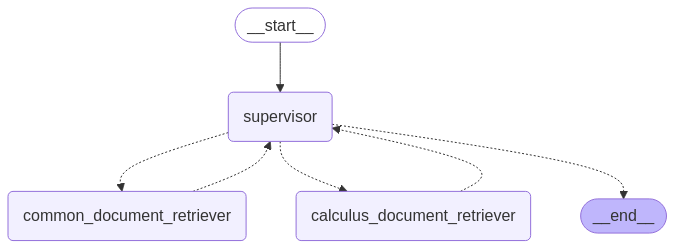

In [259]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
result = []
for s in graph.stream(
    {"messages": [("user", "Compare the number of chapters in my video about kedro-mlflow and the calculus video about infinite sequences")]}, subgraphs=True
):
    result.append(s)
    print(s)
    print("-"*100)

((), {'supervisor': {'next': 'common_document_retriever'}})
----------------------------------------------------------------------------------------------------
(('common_document_retriever:e0e92653-1fe5-572a-8845-8356cebe0f50',), {'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_oiCoYYtQbpwNGRJ6VrYI8zb8', 'function': {'arguments': '{"__arg1": "number of chapters in a video about kedro-mlflow"}', 'name': 'local_document_retriever'}, 'type': 'function'}, {'id': 'call_UD3LIlCuPBvPFQclzTeFb1HI', 'function': {'arguments': '{"__arg1": "number of chapters in a video about infinite sequences in calculus"}', 'name': 'local_document_retriever'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 76, 'prompt_tokens': 159, 'total_tokens': 235, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'aud

In [264]:
len(result)

11

In [265]:
result[-1]

((), {'supervisor': {'next': '__end__'}})

In [266]:
print(list(result[-2][1].values())[0]["messages"][0].content)

The calculus video about infinite sequences does not specify a formal number of chapters, but it includes several defined segments based on timestamps. Here are the key sections:

1. Introduction - 00:00
2. Idea of a sequence - 00:24
3. Numerical sequence - 02:51
4. Formal definition of a sequence - 04:29
5. Sequence vs Set vs Ordered set - 15:05
6. Arithmetic operations - 17:45
7. Conclusion - 20:42

This breaks down into **7 distinct sections**. 

In summary, the calculus video about infinite sequences has **7 sections**, while the Kedro-MLflow video has **12 chapters**. Thus, the Kedro-MLflow video contains more chapters than the calculus video.


Frameworks
1. [Smolagents](https://github.com/huggingface/smolagents) and https://huggingface.co/learn/cookbook/en/multiagent_rag_system
1. https://github.com/openai/openai-agents-python https://platform.openai.com/docs/guides/agents